In [ ]:
#Sentiment analysis using linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [37]:
df = pd.read_csv('Combined Data.csv')
print(df.isnull().sum())
df.describe()
print(df.columns)
if "Unnamed: 0" in df.columns:
	df = df.drop(columns=["Unnamed: 0"])
df = df.dropna(subset=["statement"])
print(df.isnull().sum())


No             0
statement    362
status         0
dtype: int64
Index(['No', 'statement', 'status'], dtype='object')
No           0
statement    0
status       0
dtype: int64


In [28]:
# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

df["clean_statement"] = df["statement"].apply(clean_text)
label_encoder = LabelEncoder()
df["encoded_status"] = label_encoder.fit_transform(df["status"])


In [29]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_statement'])
y = df['encoded_status']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [32]:
user_input = input("Enter a review statement: ")
user_vector = vectorizer.transform([user_input])
user_prediction = model.predict(user_vector)[0]

In [33]:
print("Accuracy:", accuracy)
print("Review Sentiment:", "Positive" if user_prediction == 1 else "Negative")

Accuracy: 0.7720413780013287
Review Sentiment: Negative


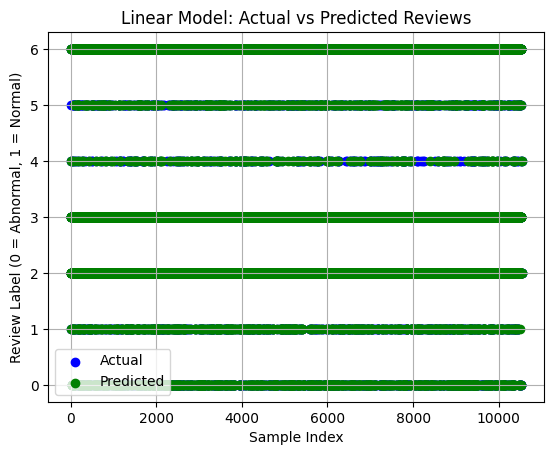

In [ ]:
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual') 
plt.scatter(np.arange(len(y_test)), y_pred, color='green', label='Predicted') 
plt.title('Linear Model: Actual vs Predicted Reviews')
plt.xlabel('Sample Index')  
plt.ylabel('Review Label (0 = Abnormal, 1 = Normal)')
plt.legend()
plt.grid(True)
plt.show()